## Necessary Libraries Immportation:

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

## Loading Data From CSV File:

In [46]:
data = pd.read_csv('META.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-01,163.029999,165.880005,161.259995,162.440002,162.440002,26407700
1,2018-10-02,161.580002,162.279999,158.669998,159.330002,159.330002,36031000
2,2018-10-03,160.000000,163.660004,159.529999,162.429993,162.429993,23109500
3,2018-10-04,161.460007,161.460007,157.350006,158.850006,158.850006,25739600
4,2018-10-05,159.210007,160.899994,156.199997,157.330002,157.330002,25744000


## Split train and validation:

In [47]:
length_data = len(data)
split_ratio = 0.7
length_train = round(length_data * split_ratio)
length_validation = length_data -length_train

In [48]:
print('length data :',length_data )
print('length train :', length_train)
print('length validation :', length_validation)

length data : 1257
length train : 880
length validation : 377


In [49]:
train_data = data[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data

,Date,Open
0,2018-10-01,163.029999
1,2018-10-02,161.580002
2,2018-10-03,160.000000
3,2018-10-04,161.460007
4,2018-10-05,159.210007
...,...,...
875,2022-03-23,213.330002
876,2022-03-24,215.000000
877,2022-03-25,220.509995
878,2022-03-28,222.130005


In [50]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])
validation_data

,Date,Open
880,2022-03-30,228.910004
881,2022-03-31,228.449997
882,2022-04-01,224.550003
883,2022-04-04,225.979996
884,2022-04-05,234.080002
...,...,...
1252,2023-09-22,299.299988
1253,2023-09-25,295.640015
1254,2023-09-26,297.660004
1255,2023-09-27,300.450012


In [51]:
dataset_train = train_data.Open.values
dataset_train.shape

(880,)

In [52]:
# reshape
dataset_train = np.reshape(dataset_train,(-1,1))
dataset_train.shape

(880, 1)

## Normalize Data:

In [53]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train_scaled = scaler.fit_transform(dataset_train)

## Visualize Data:

Text(0, 0.5, 'open price')

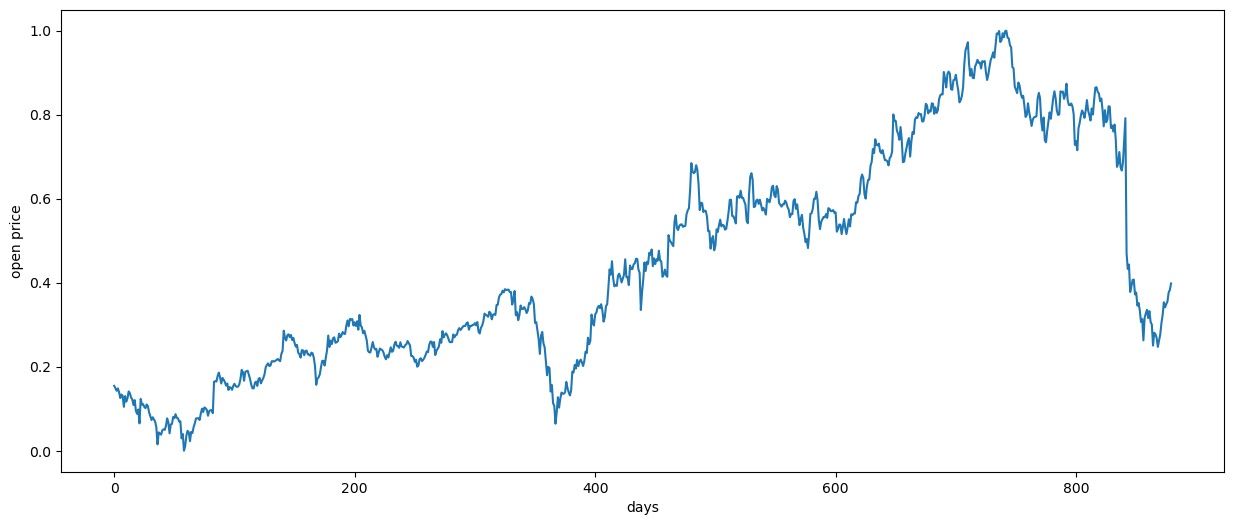

In [54]:
plt.subplots(figsize=(15,6))
plt.plot(dataset_train_scaled)
plt.xlabel('days')
plt.ylabel('open price')

In [55]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    # time_step=50, length_train=880, [51-50, 51]
    X_train.append(dataset_train_scaled[i-time_step:i, 0])
    y_train.append(dataset_train_scaled[i, 0])


X_train, y_train = np.array(X_train), np.array(y_train)

In [56]:
X_train.shape

(830, 50)

In [57]:
#reshape and expand dimension
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0] ,1))

print(X_train.shape)
print(y_train.shape)

(830, 50, 1)
(830, 1)


## RNN Model Architecture:

In [58]:
reg =Sequential()
reg.add(SimpleRNN(units=50, activation='tanh', return_sequences=True,input_shape=(X_train.shape[1], 1)))
reg.add(Dropout(0.2))
reg.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
reg.add(Dropout(0.2))
reg.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
reg.add(Dropout(0.2))
reg.add(SimpleRNN(units=50))
reg.add(Dropout(0.2))


reg.add(Dense(units=1))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Model Compile with Adam Optimizer:

In [59]:
reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = reg.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 2.8670e-04 - loss: 0.5363
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 8.2515e-04 - loss: 0.3077
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.0012 - loss: 0.2550
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.0023 - loss: 0.1920
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 8.4909e-04 - loss: 0.1484
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.0019 - loss: 0.1480
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.0026 - loss: 0.1274
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 6.6532e-04 - loss: 0.0980
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.0011 - loss: 0.0925    
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0057 - loss: 0.0848
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 9.6070e-04 - loss: 0.0748
Epoch 12/100
26/26 ━━━━━━━━

In [60]:
y_pred = reg.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step


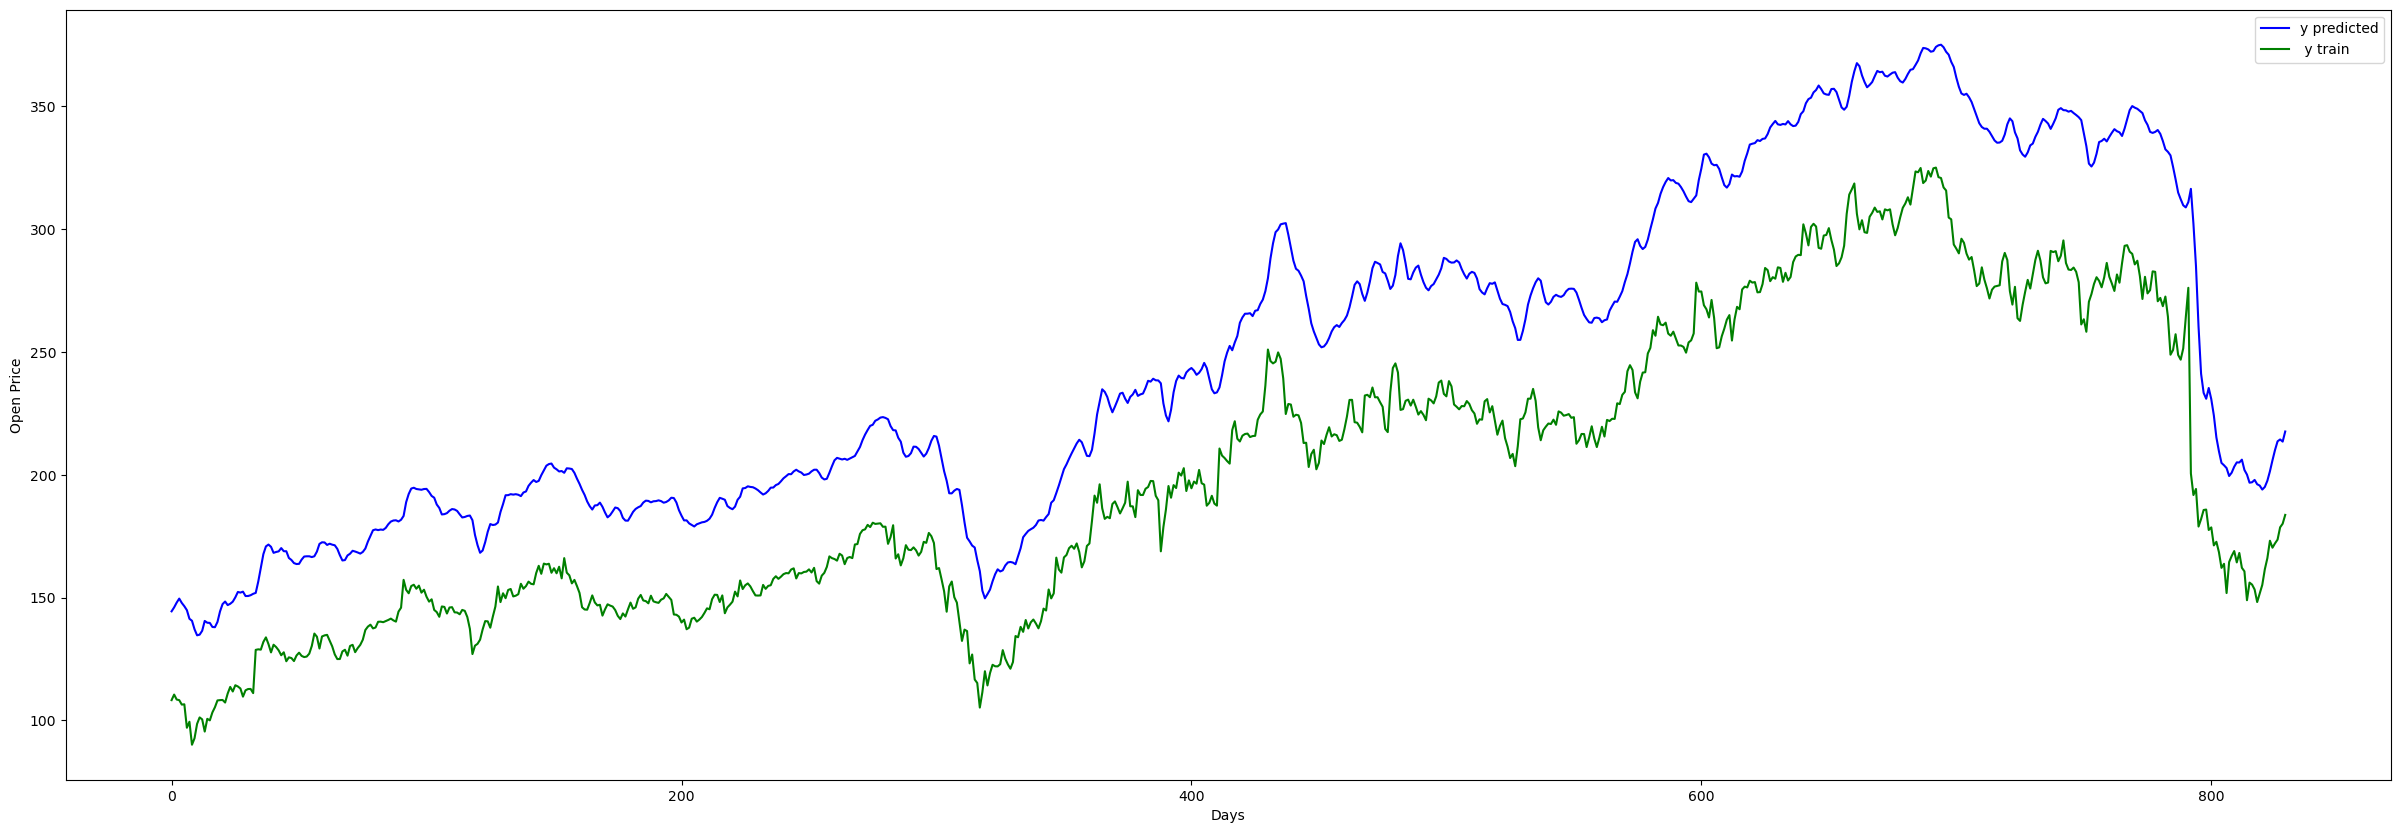

In [71]:
# plot Y_train and Y_pred
plt.figure(figsize=(30, 10))
plt.plot(y_pred, color='b', label='y predicted')
plt.plot(scaler.inverse_transform(y_train), color = 'g', label = ' y train')

plt.xlabel('Days')
plt.ylabel('Open Price')


plt.legend()

plt.show()

## Evaluate model on validation data:

In [62]:
dataset_validation = validation_data.Open.values
dataset_validation = np.reshape(dataset_validation, (-1, 1))
scaled_dataset_validation = scaler.fit_transform(dataset_validation)
scaled_dataset_validation.shape

(377, 1)

In [63]:
y_test = []
X_test = []


for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i, 0])
    y_test.append(scaled_dataset_validation[i, 0])

In [64]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [65]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (-1, 1))

In [66]:
y_pred_of_test = reg.predict(X_test)
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


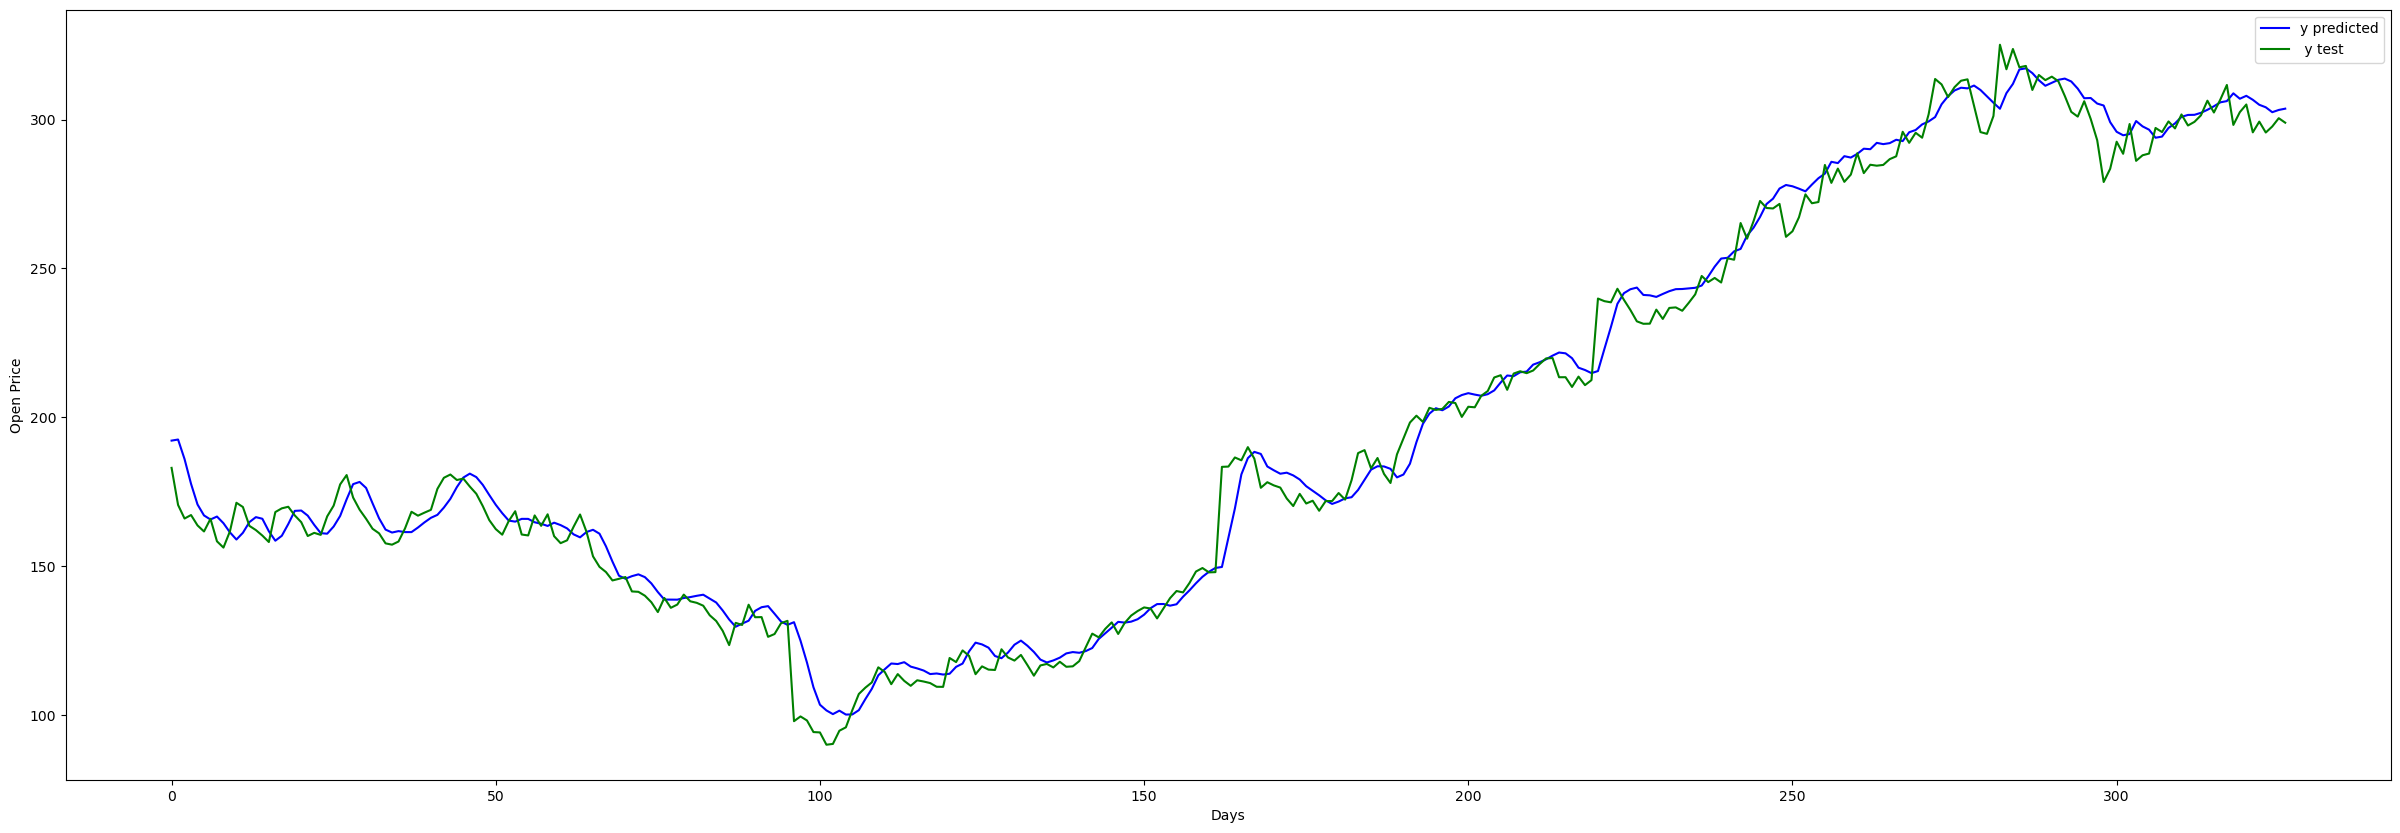

In [67]:
plt.figure(figsize=(30, 10))
plt.plot(y_pred_of_test, color='b', label='y predicted')
plt.plot( scaler.inverse_transform(y_test), color = 'g', label = ' y test')

plt.xlabel('Days')
plt.ylabel('Open Price')


plt.legend()

plt.show()